## KELOMPOK 4
### NAMA ANGGOTA:


In [ ]:
# Unduh Dataset MNIST
from  sklearn.datasets  import  Fetch_openml
mnist = Fetch_openml ( 'mnist_784' )
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print ( mnist.DESCR )
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami Struktur dari  kumpulan data MNIST
mnist.keys ()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# NOMER 1

###1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

11490434/11490434 [==============================] - 0s 0us/step
Label 0: 5923 sampel data
Label 1: 6742 sampel data
Label 2: 5958 sampel data
Label 3: 6131 sampel data
Label 4: 5842 sampel data
Label 5: 5421 sampel data
Label 6: 5918 sampel data
Label 7: 6265 sampel data
Label 8: 5851 sampel data
Label 9: 5949 sampel data


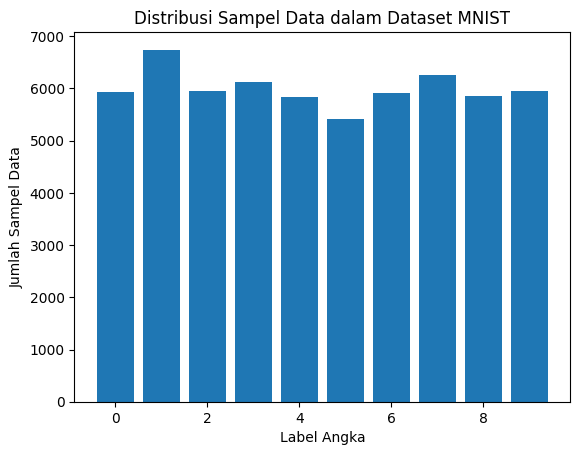

In [ ]:
# jumlah data setiap label angka (0-9)
import tensorflow as tf

# Memuat dataset MNIST dari TensorFlow
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Hitung jumlah sampel data untuk setiap label
label_counts = [0] * 10
for label in train_labels:
    label_counts[label] += 1

# Tampilkan jumlah sampel data untuk setiap label
for i in range(10):
    print(f"Label {i}: {label_counts[i]} sampel data")

# Plot grafik distribusi
import matplotlib.pyplot as plt

plt.bar(range(10), label_counts)
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Sampel Data')
plt.title('Distribusi Sampel Data dalam Dataset MNIST')
plt.show()

0    7877
1    7877
2    7877
3    7877
4    7877
5    7877
6    7877
7    7877
8    7877
9    7877
Name: class, dtype: int64


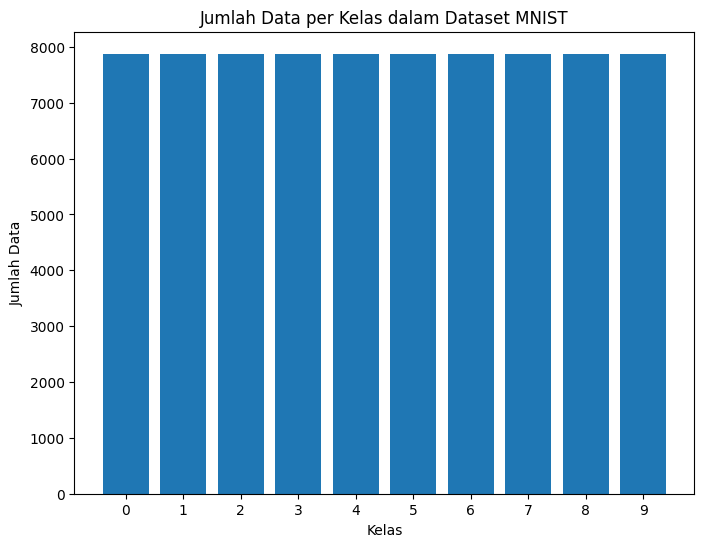

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

class_counts_resampled = pd.Series(y_resampled).value_counts()
print(class_counts_resampled)

plt.figure(figsize=(8, 6))
plt.bar(class_counts_resampled.index, class_counts_resampled.values)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Kelas dalam Dataset MNIST')
plt.xticks(class_counts_resampled.index)
plt.show()

Berdasarkan hasil distribusi label diatas, dataset MNIST cukup seimbang. Meskipun ada sedikit variasi dalam jumlah sampel untuk setiap label, variasi tersebut tidak signifikan.

Dalam konteks klasifikasi, dataset dianggap seimbang jika semua kelas memiliki jumlah sampel yang hampir sama. Dalam kasus diatas, setiap label (0-9) memiliki jumlah sampel yang hampir sama, baik dalam set pelatihan maupun set pengujian. Oleh karena itu, kita bisa mengatakan bahwa dataset seimbang.

Ketidakseimbangan kelas dapat menyebabkan model pembelajaran mesin cenderung memprediksi kelas mayoritas dan mengabaikan kelas minoritas, yang dapat menurunkan performa model pada kelas minoritas. Dengan dataset yang seimbang, model dapat belajar dari semua kelas secara merata, yang dapat meningkatkan performa keseluruhan model


# NOMER 2

###2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

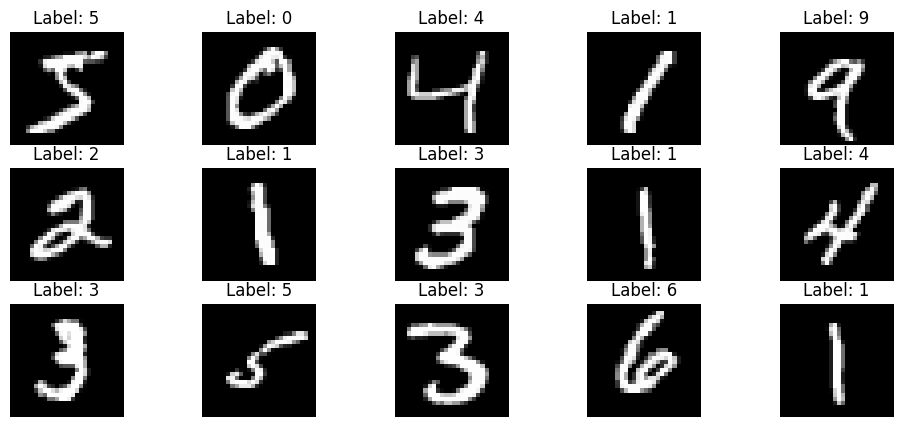

In [ ]:
# . Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.
import tensorflow as tf
import matplotlib.pyplot as plt

# Memuat dataset MNIST dari TensorFlow
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Menampilkan 15 citra pertama beserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

Menggunakan pustaka tensorflow dan matplotlib yang digunakan untuk memuat dataset MNIST dan kemudian menampilkannya. Kemudian menggunakan perulangan untuk menampilkan 15 citra pertama dari data MNIST tersebut

#NOMER 3

###3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

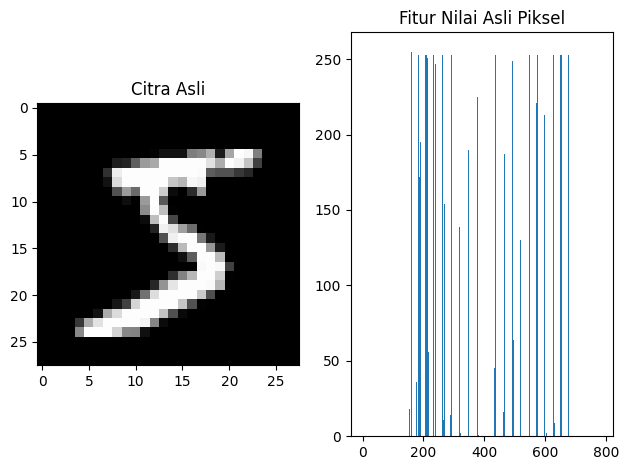

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Memuat dataset MNIST dari TensorFlow
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Memilih satu citra dari dataset
sample_image = train_images[0]

# Ekstraksi Fitur dengan Nilai Asli Piksel
raw_pixel_features = sample_image.reshape(-1)  # Menjadi larik satu dimensi (784 fitur)

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title('Citra Asli')

# Menampilkan fitur dengan nilai asli piksel
plt.subplot(1, 2, 2)
plt.bar(range(len(raw_pixel_features)), raw_pixel_features)
plt.title('Fitur Nilai Asli Piksel')

plt.tight_layout()
plt.show()

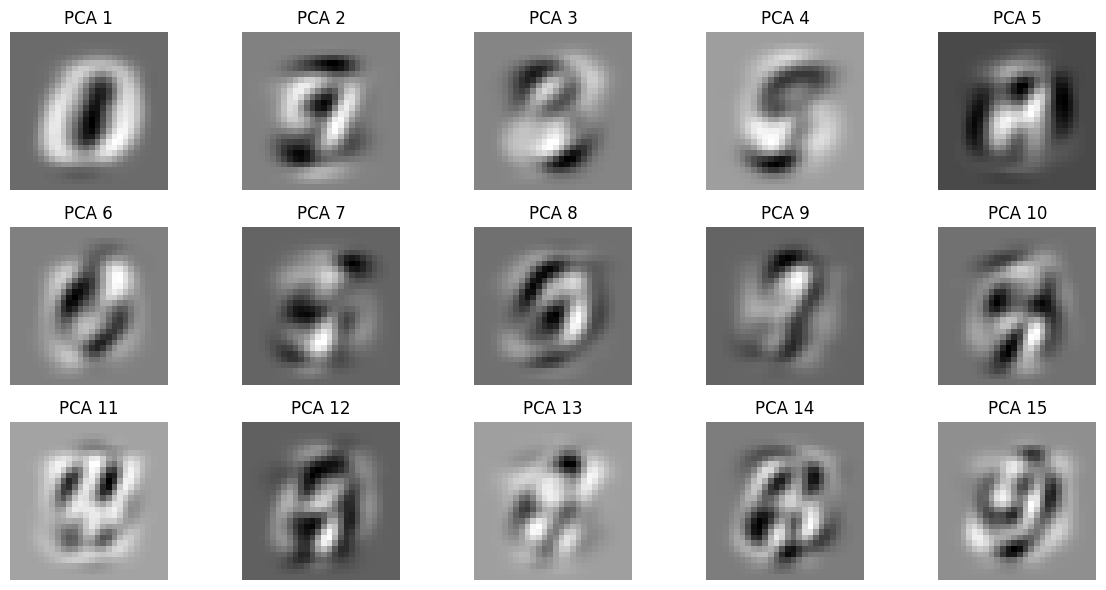

In [ ]:
#Ekstraksi Fitur dengan Metode PCA
from sklearn.decomposition import PCA

# Meratakan citra menjadi vektor
num_samples, height, width = train_images.shape
train_images_flat = train_images.reshape(num_samples, height * width)

# Normalisasi
train_images_flat_normalized = train_images_flat / 255.0

# Ekstraksi fitur menggunakan PCA
n_components = 100  # Jumlah komponen utama yang ingin diekstraksi
pca = PCA(n_components=n_components)
train_features = pca.fit_transform(train_images_flat_normalized)

# Menampilkan contoh fitur
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(height, width), cmap='gray')
    plt.title(f'PCA {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

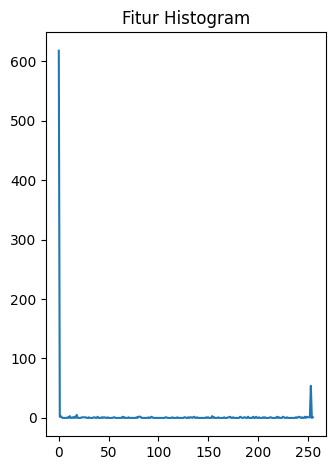

In [ ]:
import cv2

# Memuat dataset MNIST dari TensorFlow
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Memilih satu citra dari dataset
sample_image = train_images[0]

# Ekstraksi Fitur dengan Histogram
histogram = cv2.calcHist([sample_image], [0], None, [256], [0, 256])

# Menampilkan histogram fitur
plt.subplot(1, 2, 2)
plt.plot(histogram)
plt.title('Fitur Histogram')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Mengimpor dataset MNIST
mnist = fetch_openml("mnist_784")

X = mnist.data
y = mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# NOMER 4, 5, 6, 7

4.	Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5.	Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
-	Anda diperbolehkan untuk melakukan tunning parameter.
-	Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.
6.	Evaluasi model yang Anda buat terhadap data training dan data testing. Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
-	Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
-	Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.
7.	Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet03 sebagai acuan.

### RASIO 70 : 30

#### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes Multinomial
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi label pada data pengujian
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Tampilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.8242139562439169
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2344
           1       0.86      0.94      0.90      2314
           2       0.88      0.83      0.85      2345
           3       0.78      0.81      0.79      2366
           4       0.85      0.74      0.79      2336
           5       0.87      0.66      0.75      2362
           6       0.87      0.92      0.89      2380
           7       0.93      0.82      0.87      2371
           8       0.67      0.77      0.72      2404
           9       0.69      0.85      0.76      2409

    accuracy                           0.82     23631
   macro avg       0.83      0.82      0.83     23631
weighted avg       0.83      0.82      0.82     23631



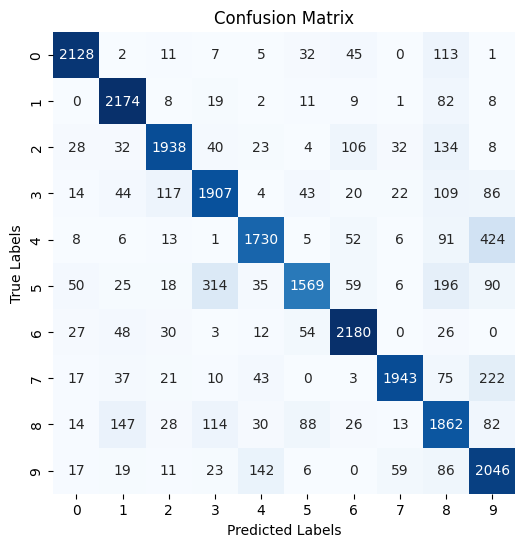

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tampilkan confusion matrix dalam bentuk heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Tampilkan Data Testing

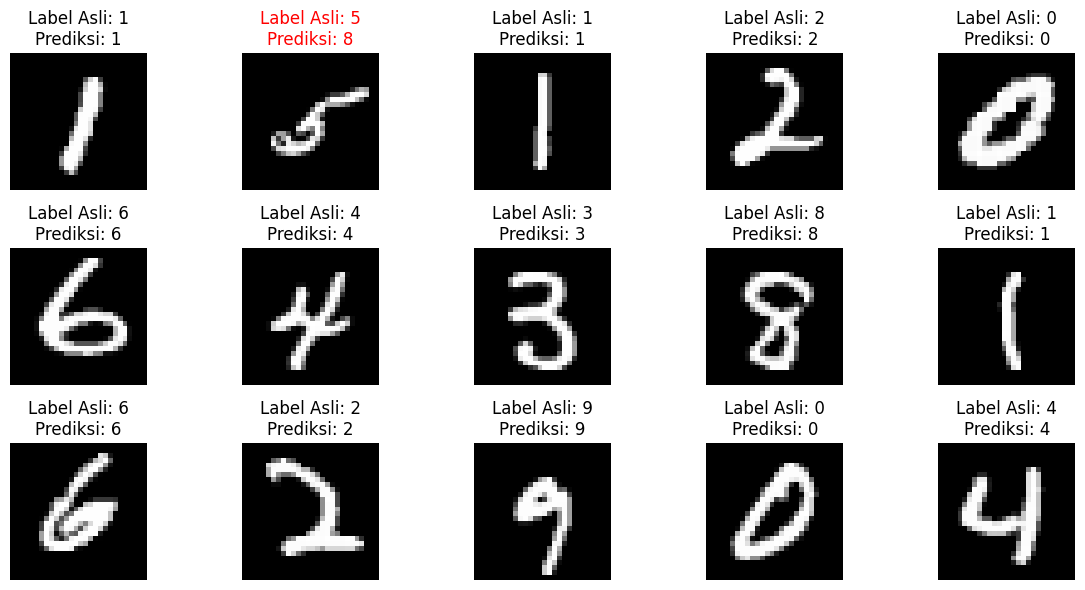

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Membagi data menjadi data training dan data testing dengan rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Membuat dan melatih model Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Melakukan prediksi
y_pred = mnb.predict(X_test)

# Menampilkan citra pada data testing
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    img = np.array(X_test.iloc[i]).reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label Asli: {y_test.values[i]}\nPrediksi: {y_pred[i]}')
    if y_pred[i] != y_test.values[i]:
        ax.title.set_color('red')
    ax.axis('off')

plt.tight_layout()
plt.show()



#### SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9325462316448733
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2344
           1       0.95      0.98      0.96      2314
           2       0.91      0.92      0.91      2345
           3       0.90      0.91      0.90      2366
           4       0.93      0.95      0.94      2336
           5       0.91      0.91      0.91      2362
           6       0.97      0.95      0.96      2380
           7       0.95      0.94      0.95      2371
           8       0.93      0.88      0.90      2404
           9       0.93      0.91      0.92      2409

    accuracy                           0.93     23631
   macro avg       0.93      0.93      0.93     23631
weighted avg       0.93      0.93      0.93     23631



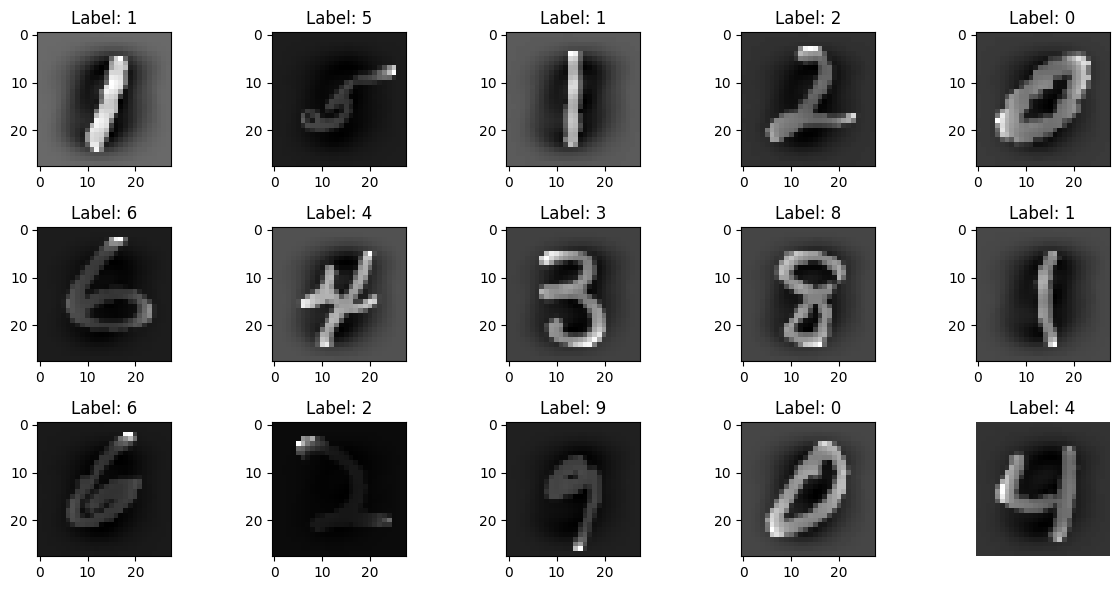

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan citra pada data testing dengan rasio 70:30
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      img = np.array(X_test[i]).reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.set_title(f'Label: {y_pred[i]}')
      if y_pred[i] != y_test.values[i]: ax.title.set_color('red')
ax.axis('off')
plt.tight_layout()
plt.show()

### RASIO 80 : 20

#### Naive Bayes


In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes Multinomial
model = MultinomialNB()

In [ ]:
model.fit(X_train1, y_train1)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi label pada data pengujian
y_pred1 = model.predict(X_test1)

# Hitung akurasi
accuracy = accuracy_score(y_test1, y_pred1)
print("Akurasi:", accuracy)

# Tampilkan laporan klasifikasi
report = classification_report(y_test1, y_pred1)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.822775168211248
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1553
           1       0.86      0.94      0.90      1511
           2       0.88      0.82      0.85      1556
           3       0.78      0.80      0.79      1579
           4       0.85      0.75      0.80      1574
           5       0.88      0.68      0.76      1631
           6       0.87      0.92      0.89      1582
           7       0.93      0.82      0.87      1603
           8       0.65      0.77      0.70      1553
           9       0.69      0.84      0.76      1612

    accuracy                           0.82     15754
   macro avg       0.83      0.82      0.82     15754
weighted avg       0.83      0.82      0.82     15754



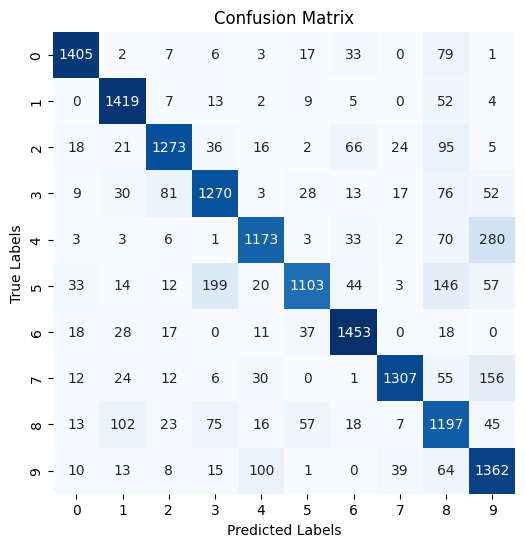

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tampilkan confusion matrix dalam bentuk heatmap
cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Tampilkan Data Testing

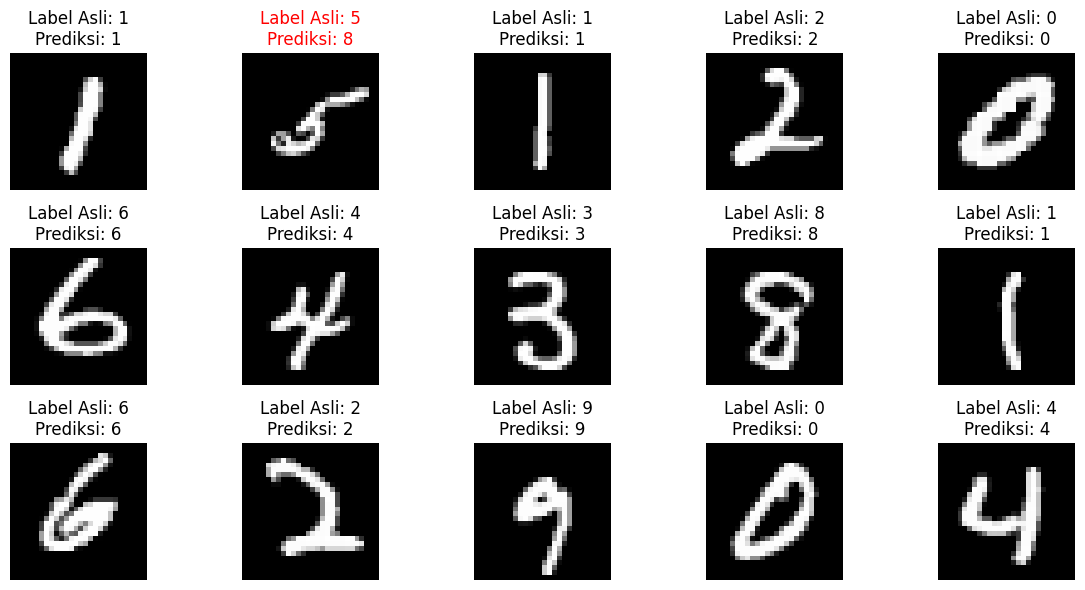

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Membagi data menjadi data training dan data testing dengan rasio 80:20
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat dan melatih model Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train1, y_train1)

# Melakukan prediksi
y_pred = mnb.predict(X_test1)

# Menampilkan citra pada data testing
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    img = np.array(X_test1.iloc[i]).reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label Asli: {y_test1.values[i]}\nPrediksi: {y_pred[i]}')
    if y_pred[i] != y_test1.values[i]:
        ax.title.set_color('red')
    ax.axis('off')

plt.tight_layout()
plt.show()


#### SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train1, y_train1)

SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred1 = svm_classifier.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
report1 = classification_report(y_test1, y_pred1)
print(f'Accuracy: {accuracy1}')
print(report1)

Accuracy: 0.9351910625872795
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1553
           1       0.96      0.98      0.97      1511
           2       0.91      0.92      0.92      1556
           3       0.89      0.91      0.90      1579
           4       0.93      0.94      0.94      1574
           5       0.92      0.93      0.93      1631
           6       0.97      0.95      0.96      1582
           7       0.95      0.94      0.94      1603
           8       0.93      0.89      0.91      1553
           9       0.93      0.91      0.92      1612

    accuracy                           0.94     15754
   macro avg       0.94      0.94      0.94     15754
weighted avg       0.94      0.94      0.94     15754



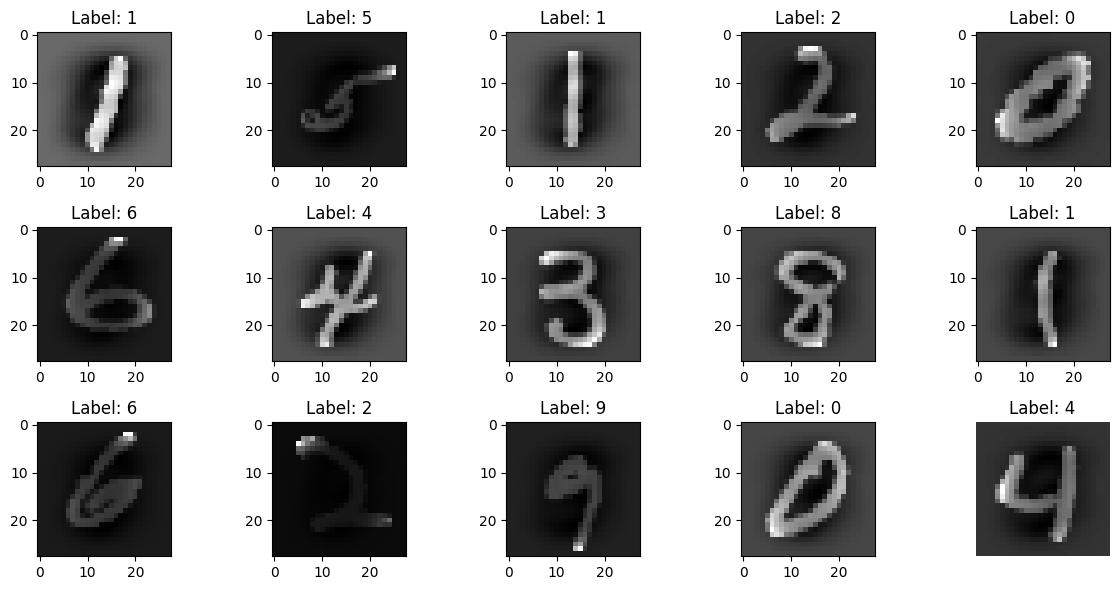

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan citra pada data testing dengan rasio 80:20
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      img = np.array(X_test1[i]).reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.set_title(f'Label: {y_pred1[i]}')
      if y_pred1[i] != y_test1.values[i]: ax.title.set_color('red')
ax.axis('off')
plt.tight_layout()
plt.show()

### Rasio 90 : 10

#### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes Multinomial
model = MultinomialNB()

In [ ]:
model.fit(X_train2, y_train2)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi label pada data pengujian
y_pred2 = model.predict(X_test2)

# Hitung akurasi
accuracy = accuracy_score(y_test2, y_pred2)
print("Akurasi:", accuracy)

# Tampilkan laporan klasifikasi
report = classification_report(y_test2, y_pred2)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.8216326012441285
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       788
           1       0.85      0.94      0.89       729
           2       0.89      0.82      0.85       770
           3       0.79      0.80      0.80       807
           4       0.86      0.75      0.80       812
           5       0.88      0.68      0.77       832
           6       0.86      0.92      0.89       787
           7       0.95      0.81      0.87       819
           8       0.63      0.76      0.69       745
           9       0.69      0.84      0.75       788

    accuracy                           0.82      7877
   macro avg       0.83      0.82      0.82      7877
weighted avg       0.83      0.82      0.82      7877



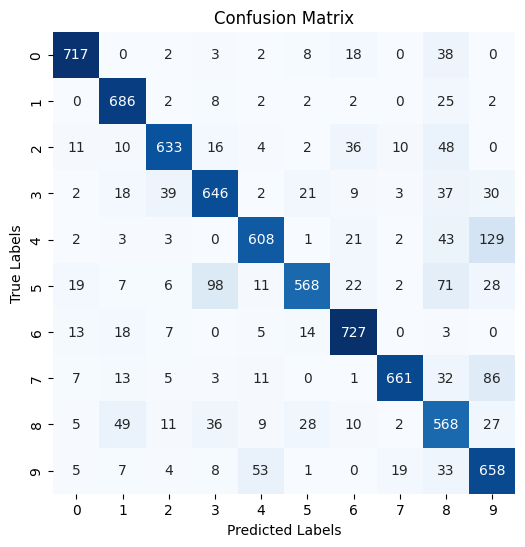

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tampilkan confusion matrix dalam bentuk heatmap
cm = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Tampilkan Hasil Testing

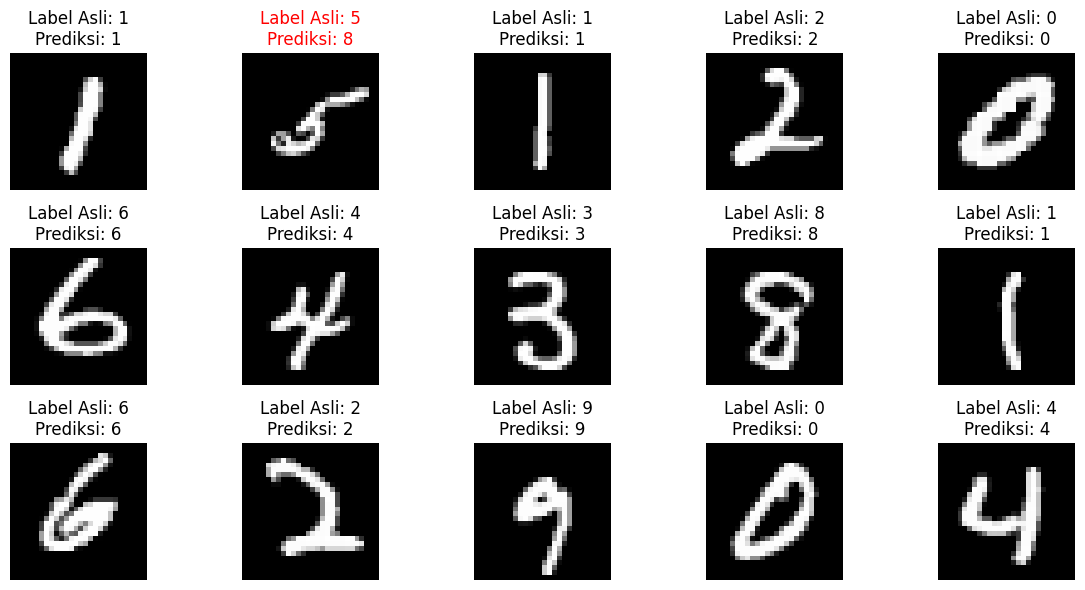

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Membagi data menjadi data training dan data testing dengan rasio 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membuat dan melatih model Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train2, y_train2)

# Melakukan prediksi
y_pred = mnb.predict(X_test2)

# Menampilkan citra pada data testing
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    img = np.array(X_test2.iloc[i]).reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label Asli: {y_test2.values[i]}\nPrediksi: {y_pred[i]}')
    if y_pred[i] != y_test2.values[i]:
        ax.title.set_color('red')
    ax.axis('off')

plt.tight_layout()
plt.show()


#### SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train2, y_train2)

SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred2 = svm_classifier.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
report2 = classification_report(y_test2, y_pred2)
print(f'Accuracy: {accuracy2}')
print(report2)

Accuracy: 0.9351910625872795
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1553
           1       0.96      0.98      0.97      1511
           2       0.91      0.92      0.92      1556
           3       0.89      0.91      0.90      1579
           4       0.93      0.94      0.94      1574
           5       0.92      0.93      0.93      1631
           6       0.97      0.95      0.96      1582
           7       0.95      0.94      0.94      1603
           8       0.93      0.89      0.91      1553
           9       0.93      0.91      0.92      1612

    accuracy                           0.94     15754
   macro avg       0.94      0.94      0.94     15754
weighted avg       0.94      0.94      0.94     15754



#### Tampilkan Data Testing

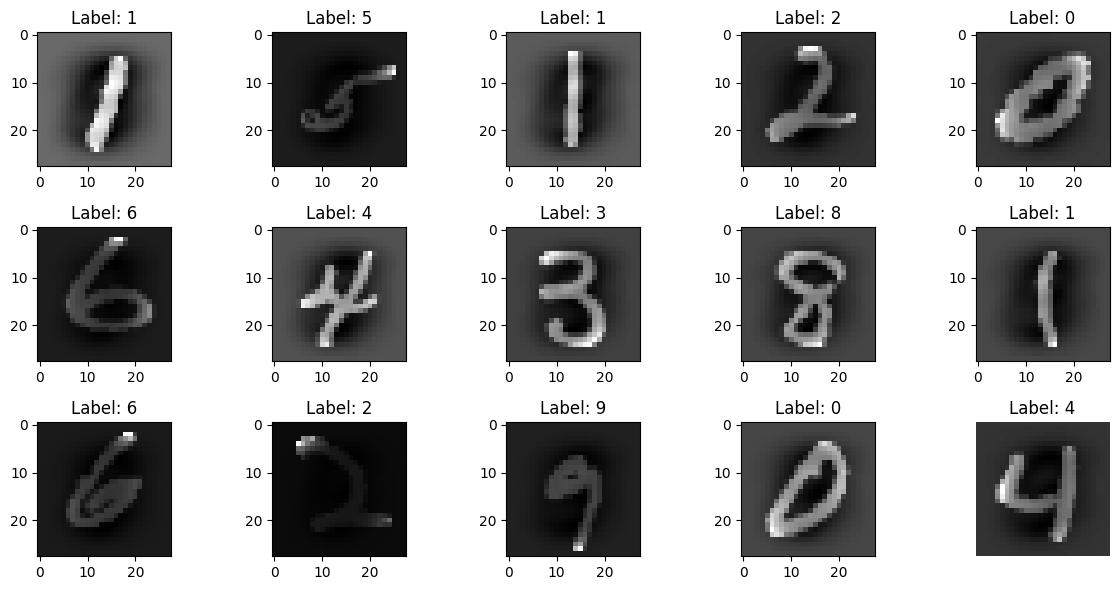

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menampilkan citra pada data testing dengan rasio 90:10
plt.figure(figsize=(12, 6))
num_rows = 3
num_cols = 5

for i in range(num_rows * num_cols):
      ax = plt.subplot(num_rows, num_cols, i + 1)
      img = np.array(X_test2[i]).reshape(28, 28)
      ax.imshow(img, cmap='gray')
      ax.set_title(f'Label: {y_pred2[i]}')
      if y_pred2[i] != y_test2.values[i]: ax.title.set_color('red')
ax.axis('off')
plt.tight_layout()
plt.show()

# NOMER 8

Dari perbandingan akurasi yang terdapat pada Soal no 6, klasifikasi data MNIST menggunakan model Naive Bayes dan SVM berikut:
**Support Vector Machine (SVM)**
- SVM1(70:30): Akurasi SVM = 0.9325462316448733
- SVM2(80:20): Akurasi SVM = 0.9351910625872795
- SVM3(90:10): Akurasi SVM = 0.9351910625872795

**Naive Bayes**
- NaiveBayes(70:30): Akurasi data uji = 0.8242139562439169
- NaiveBayes2(80:20): Akurasi data uji = 0.822775168211248
- NaiveBayes3(90:10): Akurasi data uji = 0.8216326012441285

dapat disimpulkan bahwa Model SVM dengan kernel linear cenderung menjadi pilihan yang lebih baik dalam tugas klasifikasi data MNIST dibandingkan dengan Naive Bayes. Hal ini disebabkan oleh kemampuan SVM untuk menangani masalah klasifikasi dengan baik, terutama pada data yang memiliki dimensi tinggi seperti citra MNIST.
- Akurasi yang bagus pada data latih dan data uji menunjukkan bahwa model SVM mencapai kemampuan generalisasi dan kemampuan yang baik dalam membedakan angka tulisan tangan. Secara keseluruhan, model SVM dengan kernel linier dapat dianggap sebagai model terbaik untuk tugas ini berdasarkan hasil evaluasi akurasi.